#**Import libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, auc, plot_confusion_matrix, plot_roc_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#**Read the data**

In [ ]:
#read the data from csv file, making the first column as an index for our data records
df= pd.read_csv('data.csv',index_col=0)

In [ ]:
# first 5 rows of the DataFrame
df.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


#**Data Exploration**

In [ ]:
# shape of dataset
df.shape

(863, 14)

In [ ]:
# Quick overview of the dataset (Statistical summary)
df.describe()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.00000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,76.645423,16.995365,0.849363,49.400000,0.181924,0.107764,12.13905,28.002317,18.298957,11.840093,2.993048,0.998841,0.995365,0.125145
std,39.200264,7.809951,0.726062,15.079203,0.386005,0.310261,3.99787,7.473231,2.864064,1.183771,0.127251,0.034040,2.358767,0.331075
min,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000
25%,45.000000,11.000000,0.000000,40.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
50%,87.000000,18.000000,1.000000,49.400000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
75%,110.000000,24.000000,1.000000,57.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,1.000000,0.000000
max,138.000000,33.000000,2.000000,96.000000,1.000000,1.000000,24.00000,31.000000,19.000000,12.000000,3.000000,1.000000,15.000000,1.000000


In [ ]:
# The full summary
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 863 entries, 0 to 862
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      863 non-null    int64  
 1   country       863 non-null    int64  
 2   gender        863 non-null    int64  
 3   age           863 non-null    float64
 4   vis_wuhan     863 non-null    int64  
 5   from_wuhan    863 non-null    int64  
 6   symptom1      863 non-null    int64  
 7   symptom2      863 non-null    int64  
 8   symptom3      863 non-null    int64  
 9   symptom4      863 non-null    int64  
 10  symptom5      863 non-null    int64  
 11  symptom6      863 non-null    int64  
 12  diff_sym_hos  863 non-null    int64  
 13  result        863 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 101.1 KB


From our initial look at the data, we found that the data does not contain empty values

#**Splitting the data**

In [ ]:
# Split the dataset to feature coulmns(X) & label coulmn(Y)
X= df.iloc[:,:-1]
Y= df.iloc[:,-1]

In [ ]:
print('Shape of Features: ',X.shape)
print('Shape of Label: ',Y.shape)

Shape of Features:  (863, 13)
Shape of Label:  (863,)


In [ ]:
# Splitting the dataset to training data & testing data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1, shuffle=True, stratify= Y)

In [ ]:
print('Shape of X_train: ',x_train.shape)
print('Shape of X_test: ',x_test.shape)
print('Shape of Y_train: ',y_train.shape)
print('Shape of Y_test: ',y_test.shape)

Shape of X_train:  (690, 13)
Shape of X_test:  (173, 13)
Shape of Y_train:  (690,)
Shape of Y_test:  (173,)


#**Scalling the data**

In [ ]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
# before scaling
x_train

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos
524,114,29,2,49.4,0,1,14,31,19,12,3,1,0
306,117,18,1,45.0,0,0,6,17,19,12,3,1,0
208,22,18,1,45.0,0,1,14,31,19,12,3,1,3
385,106,23,0,71.0,0,0,14,31,19,12,3,1,0
663,121,30,2,49.4,0,0,14,31,19,12,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,22,18,1,45.0,0,0,10,19,2,7,3,1,6
556,19,32,1,49.4,1,0,14,31,19,12,3,1,0
596,118,7,0,65.0,0,0,14,31,19,12,3,1,0
534,114,29,2,49.4,0,0,14,31,19,12,3,1,0


In [ ]:
# after scalling
x_train_scaled

array([[0.82608696, 0.87878788, 1.        , ..., 1.        , 1.        ,
        0.25      ],
       [0.84782609, 0.54545455, 0.5       , ..., 1.        , 1.        ,
        0.25      ],
       [0.15942029, 0.54545455, 0.5       , ..., 1.        , 1.        ,
        0.4       ],
       ...,
       [0.85507246, 0.21212121, 0.        , ..., 1.        , 1.        ,
        0.25      ],
       [0.82608696, 0.87878788, 1.        , ..., 1.        , 1.        ,
        0.25      ],
       [0.08695652, 0.36363636, 0.5       , ..., 1.        , 1.        ,
        0.25      ]])

#**Functions**

In [ ]:
# Function to make predictions
def prediction(y_data_train, x_data_test, model):    
    y_pred= model.predict(x_data_test)
    train_acc = accuracy_score(y_data_train, y_pred)
    print('Accuracy: ',train_acc)
    return y_pred

In [ ]:
# Function to make precisions score, recall score, f1 score
def precision_recall_f1(y_test_pred):
    precision = precision_score(y_test, y_test_pred, average='binary')
    recall =recall_score(y_test, y_test_pred, average='binary')
    f1=f1_score(y_test, y_test_pred, average='binary')

    print('precision',precision)
    print('recall',recall)
    print('fscore',f1)

In [ ]:
# Function to draw the plot Roc curve
def plot_roc(y_test, y_score):

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    plt.figure()
    lw = 2
    plt.plot(fpr["micro"], tpr["micro"], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc["micro"])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

#**Models**

## K-Nearest Neighbors

In [ ]:
# finding the best K that gives the best score on the validation set
# the size of trainig is 690 so the max_k = 26 
max_num_k = 26
knn_parameters = {
    "n_neighbors": list(range(1, max_num_k, 2))
}

In [ ]:
#create new model object
KNN= KNeighborsClassifier()

In [ ]:
# the score to knn_cv which is the best classifier is Recall
knn_cv = GridSearchCV(KNN, knn_parameters, cv=10, scoring='recall')

In [ ]:
# Picks the best classifier out of the 120 classifiers with thew best k for our application
best_knn = knn_cv.fit(x_train_scaled,y_train).best_estimator_

In [ ]:
#display the accuracy
KNN_y_train_pred = prediction(y_train, x_train_scaled, best_knn)
KNN_y_test_pred = prediction(y_test, x_test_scaled, best_knn)

Accuracy:  1.0
Accuracy:  0.9421965317919075


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


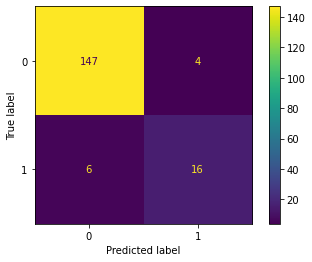

In [ ]:
# Confusion Matrix
plot_confusion_matrix(best_knn, x_test_scaled, y_test)

In [ ]:
# display precision, recall, fscore for our model
precision_recall_f1(KNN_y_test_pred)

precision 0.8
recall 0.7272727272727273
fscore 0.761904761904762


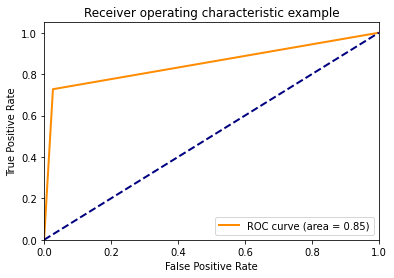

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


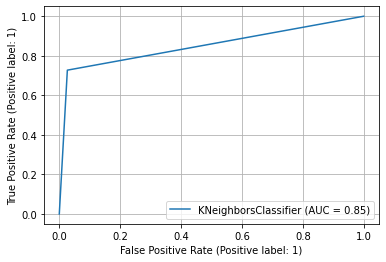

In [ ]:
# ROC curve
plot_roc(y_test, KNN_y_test_pred)

plot_roc_curve(best_knn, x_test_scaled, y_test)
plt.grid()

## Logistic Regression

In [ ]:
# Hyperparameter Tunning
# C : 1**-5 -> 1**5 
log_parameters = {
    "C" : np.logspace(-5, 5, 10)
}

In [ ]:
# create new model object
log = LogisticRegression()

In [ ]:
# the score to log_clf_cv which is the best classifier is Recall
log_cv = GridSearchCV(log, log_parameters, cv=10, scoring='recall')

In [ ]:
# Picks the best classifier for our application
best_log = log_cv.fit(x_train_scaled,y_train).best_estimator_
best_log

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(C=599.4842503189421)

In [ ]:
print('penalty : ' ,best_log.penalty,  '\n C : ',best_log.C)

penalty :  l2 
 C :  599.4842503189421


In [ ]:
# display the accuracy
log_y_train_pred = prediction(y_train, x_train_scaled, best_log)
log_y_test_pred = prediction(y_test, x_test_scaled, best_log)

Accuracy:  0.9449275362318841
Accuracy:  0.9479768786127167


In [ ]:
# display precision, recall, fscore for our model
precision_recall_f1(log_y_test_pred)

precision 0.8095238095238095
recall 0.7727272727272727
fscore 0.7906976744186046


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


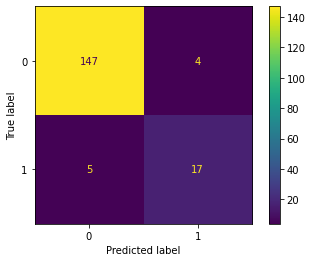

In [ ]:
# Confusion Matrix
plot_confusion_matrix(best_log, x_test_scaled, y_test)

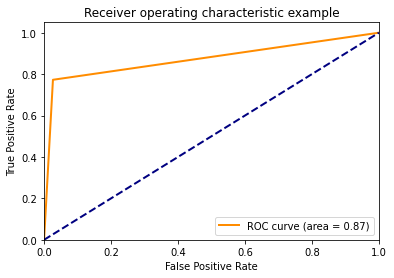

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


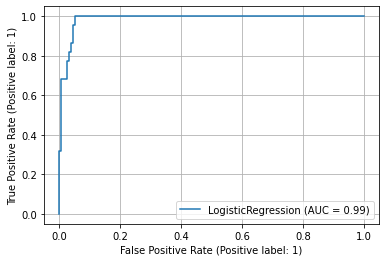

In [ ]:
# ROC curve
plot_roc(y_test, log_y_test_pred)

plot_roc_curve(best_log, x_test_scaled, y_test)
plt.grid()

## Naiive Bayes

In [ ]:
# Hyperparameter Tunning
Naive_parameter = {'var_smoothing': np.logspace(0,-9, num=100)}

In [ ]:
# create new model object
Naive= GaussianNB()

In [ ]:
# the score to Naive_cv which is the best classifier is Recall
Naive_cv = GridSearchCV(Naive, Naive_parameter, cv=10, scoring='recall')

In [ ]:
# Picks the best classifier for our application
best_Naive= Naive_cv.fit(x_train_scaled, y_train).best_estimator_
best_Naive

GaussianNB(var_smoothing=2.848035868435799e-06)

In [ ]:
print("var_smoothing = ", best_Naive.var_smoothing)

var_smoothing =  2.848035868435799e-06


In [ ]:
#display the accuracy
Naive_y_train_pred = prediction(y_train, x_train_scaled, best_Naive)
Naive_y_test_pred = prediction(y_test, x_test_scaled, best_Naive)

Accuracy:  0.30289855072463767
Accuracy:  0.2947976878612717


In [ ]:
# display precision, recall, fscore for our model
precision_recall_f1(Naive_y_test_pred)

precision 0.1527777777777778
recall 1.0
fscore 0.26506024096385544


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


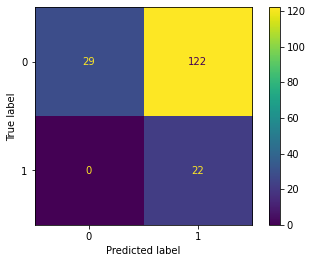

In [ ]:
# Confusion Matrix
plot_confusion_matrix(best_Naive, x_test_scaled, y_test)

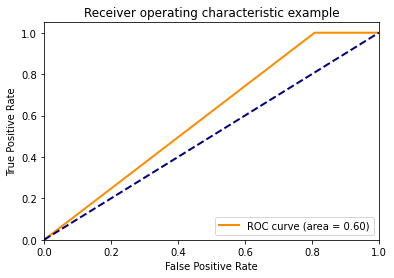

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


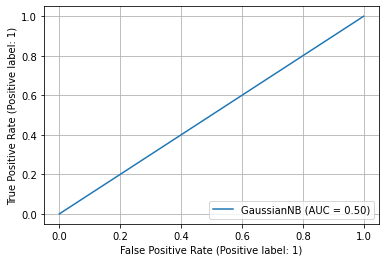

In [ ]:
# ROC curve 
plot_roc(y_test, Naive_y_test_pred)

plot_roc_curve(best_Naive, x_test, y_test)
plt.grid()

## Decision Trees

In [ ]:
# Identifing differenet hyperparameter to tune
DT_parameter = [
    {
        'criterion': ['gini', 'entropy'],
        'max_depth': list(range(4,13,2))
    }
]

In [ ]:
# Create Decision Tree classifer object
DTC = DecisionTreeClassifier()

In [ ]:
# the score to DT_clf_cv which is the best classifier is Recall
DT_cv = GridSearchCV(DTC, DT_parameter, cv=10, scoring='recall')

In [ ]:
# Train Decision Tree Classifer
best_DT = DT_cv.fit(x_train_scaled,y_train).best_estimator_
best_DT

DecisionTreeClassifier(max_depth=10)

In [ ]:
print("Max_depth = ", best_DT.max_depth, "\n criterion = " , best_DT.criterion )

Max_depth =  10 
 criterion =  gini


In [ ]:
#display the accuracy
DTC_y_train_pred = prediction(y_train, x_train_scaled, best_DT)
DTC_y_test_pred = prediction(y_test, x_test_scaled, best_DT)

Accuracy:  1.0
Accuracy:  0.9710982658959537


In [ ]:
# display precision, recall, fscore for our model
precision_recall_f1(DTC_y_test_pred)

precision 0.9047619047619048
recall 0.8636363636363636
fscore 0.8837209302325582


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


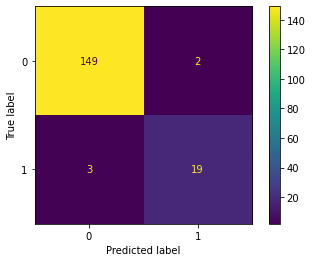

In [ ]:
# Confusion Matrix 
plot_confusion_matrix(best_DT, x_test_scaled, y_test)


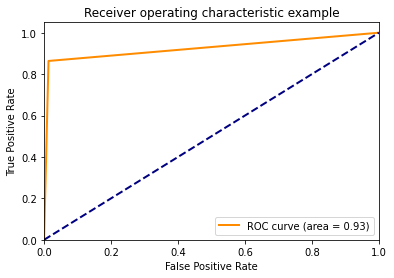

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


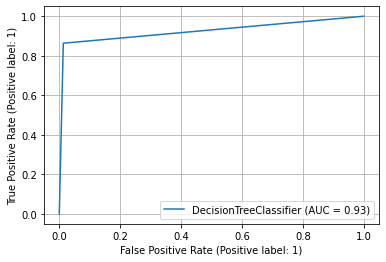

In [ ]:
# ROC curve 
plot_roc(y_test, DTC_y_test_pred)

plot_roc_curve(best_DT, x_test_scaled, y_test)
plt.grid()

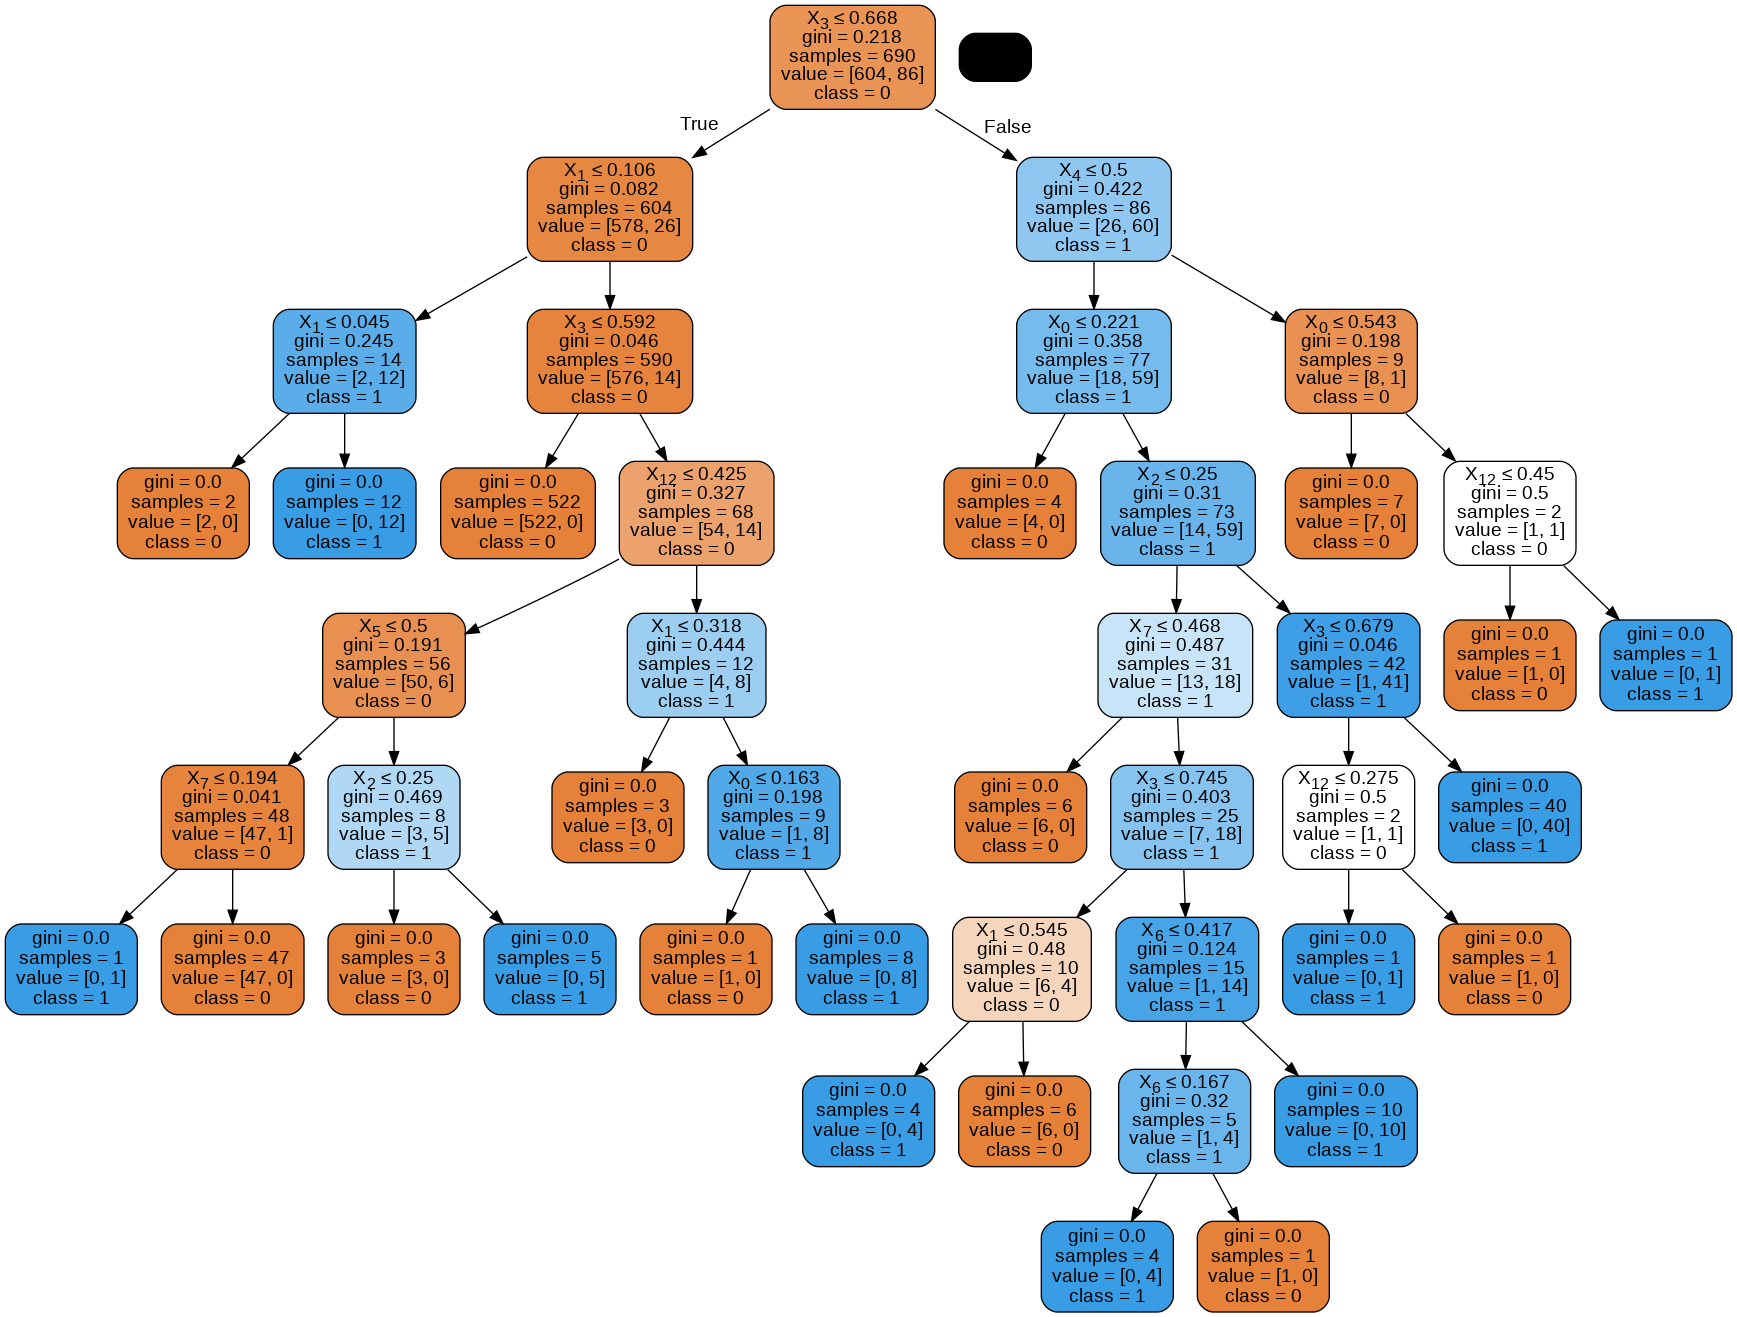

In [ ]:
# plotting the Decision Tree
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
import graphviz

dot_data = StringIO()
export_graphviz(best_DT, out_file=dot_data, rounded=True,
                filled=True, special_characters=True, class_names=["0", "1"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("COVID-19_Decision.png")
Image(graph.create_png())

### Support Vector Machine

In [ ]:
# Hyperparameter Tunning
svm_parameter = {
    "C": np.logspace(-5, 5, 4),
    "kernel": ['poly', 'rbf'],
    "degree": list(range(1,10))
}

In [ ]:
# Create Decision Tree classifer object
svm = SVC()

In [ ]:
# the score to vm_cv which is the best classifier is Recall
svm_cv = GridSearchCV(svm, svm_parameter, cv=10, scoring='recall')

In [ ]:
# Train SVM Classifer
best_svm = svm_cv.fit(x_train_scaled,y_train).best_estimator_
best_svm

SVC(C=46.41588833612782, kernel='poly')

In [ ]:
#display the accuracy
svm_y_train_pred = prediction(y_train, x_train_scaled, best_svm)
svm_y_test_pred = prediction(y_test, x_test_scaled, best_svm)

Accuracy:  0.9942028985507246
Accuracy:  0.9942196531791907


In [ ]:
# display precision, recall, fscore for our model
precision_recall_f1(svm_y_test_pred)

precision 0.9565217391304348
recall 1.0
fscore 0.9777777777777777


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


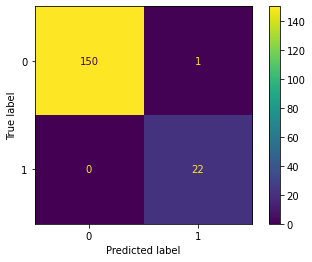

In [ ]:
# Confusion Matrix 
plot_confusion_matrix(best_svm, x_test_scaled, y_test)

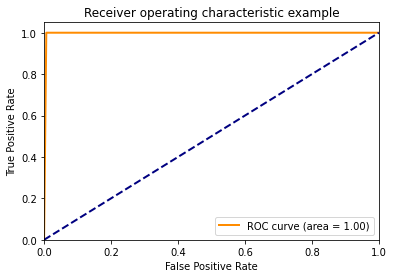

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


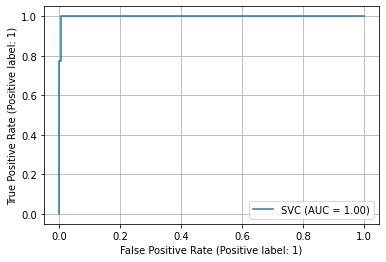

In [ ]:
# ROC curve 
plot_roc(y_test, svm_y_test_pred)

plot_roc_curve(best_svm, x_test_scaled, y_test)
plt.grid()

#**Comparision**
### ROC Curve for all used algorithms to show the best algorithm.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. U

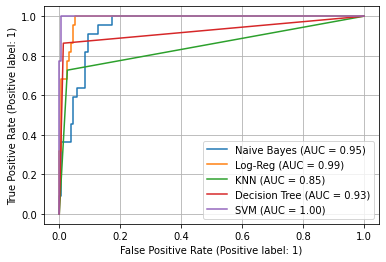

In [ ]:
display = plot_roc_curve(best_Naive, x_test_scaled, y_test,name="Naive Bayes")
plot_roc_curve(best_log, x_test_scaled, y_test, ax=display.ax_ ,name="Log-Reg")
plot_roc_curve(best_knn,x_test_scaled,y_test,ax=display.ax_,name="KNN")
plot_roc_curve(best_DT,x_test_scaled,y_test,ax=display.ax_,name="Decision Tree")
plot_roc_curve(best_svm,x_test_scaled,y_test,ax=display.ax_,name="SVM")
plt.grid()
plt.show()